# Исследование поведения пользователей аренды сервиса самокатов 

## 1 Описание проекта

     В моём распоряжении данные о некоторых пользователях сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках.

    Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
    * без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 88 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
 
    *с подпиской Ultra
    *абонентская плата — 199 рублей в месяц;
    *стоимость одной минуты поездки — 66 рублей;
    *стоимость старта — бесплатно.
    
                 
   ## 2  Описание данных 
   
    В основных данных есть информация о пользователях, их поездках и подписках.
    
    * user_id - уникальный идентификатор пользователя
    * name - имя пользователя
    * age - возраст 
    * city - город 
    * subscription_type - тип подписки (free,ultra) 
    * distance - расстояние, которое пользователь проехал в текущей сессии (в метрах) 
    * duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку» 
    * date - дата совершения поездки 
    * minute_price - стоимость одной минуты поездки по данной подписке 
    * start_ride_price - стоимость начала поездки
    * subscription_fee - стоимость ежемесячного платежа 
    
    
    Цель исследования - проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
    
    Ход исследования содержит следующие этапы:
    1) Загрузка данных; 
    2) Предобработка данных;
    3) Исследовательский анализ данных
    4) Объединение данных 
    5) Подсчет выручки
    6) Проверка гипотез 
    7) Общий вывод

## 3  Шаг 1. Загрузка данных 

    Загрузим библиотеки, которые будут необходимы для работы 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
from math import factorial 

   ## 4 1.1 Посчитаем CSV-файлы с данными с помощью библиотеки Pandas и сохраним их в датафреймы

In [4]:
#  Используем конструкцию try-except: 
   
try:

    df_users = pd.read_csv('/datasets/users_go.csv', sep = ',') 
       
except: 
    df_users = pd.read_csv('C:\\Users\\user\\Downloads\\users_go.csv', sep = ',')


In [5]:
# выведем на экран первые 5 строк датафрейма 
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
# выведем на экран последние 5 строк датафрейма 
df_users.tail()

,user_id,name,age,city,subscription_type
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


In [7]:
#  Используем конструкцию try-except: 
   
try:

    df_rides = pd.read_csv('/datasets/rides_go.csv', sep = ',') 
       
except: 
  
    df_rides = pd.read_csv('C:\\Users\\user\\Downloads\\rides_go.csv', sep = ',')
 

In [8]:
# выведем на экран первые пять строк датафрейма 
df_rides.head() 

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
# выведем на экран последние пять строк датафрейма 
df_rides.head() 

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [13]:
#  Используем конструкцию try-except: 
   
try: 

    df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep = ',') 
       
except: 
  
    df_subscriptions = pd.read_csv('C:\\Users\\user\\Downloads\\subscriptions_go.csv', sep = ',')

In [15]:
# выведем на экран первые пять строк датафрейма 
df_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


  ## 5  1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [17]:
# Изучим датафрейм df_users, где содержится информация о пользователях сервиса аренды самокатов GoFast. Выведем на экран первые 10 строк датафрейма
df_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [18]:
# Посчитаем количество строк датафрейма df_users
len(df_users)


1565

    В нашем датафрейме есть 5 столбцов и 1565 строк. Столбец user_id означает уникальный идентификатор пользователя. В столбце name содержится имя пользователя. В столбце age - возраст, в city - информация о городе пользователя, в столбце subsription_type информация о типе подписки(free, ultra). 

In [20]:
# Выведем 10 случайных строк датафрейма с помощью метода sample()
df_users.sample(random_state=1, n=10) 

,user_id,name,age,city,subscription_type
1267,1268,Юлия,26,Краснодар,free
894,895,Мирон,25,Сочи,free
270,271,Эмилия,22,Пятигорск,ultra
1086,1087,Петр,29,Ростов-на-Дону,free
1441,1442,Виктор,33,Екатеринбург,free
1016,1017,Марина,25,Екатеринбург,free
572,573,Петр,23,Краснодар,ultra
1350,1351,Захар,22,Ростов-на-Дону,free
1541,659,Злата,27,Ростов-на-Дону,ultra
920,921,Артур,28,Омск,free


In [21]:
# Изучим общую информацию о датасете с помощью метода info() и ознакомимся с типом данных.
df_users.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


     Видим, что общий объем хранимых в датасете данных составил 61.3 килобайта. Всего три столбца с типом данных object(name, city, subsription_type) и 2 столбца с целочисленным типом данных int(user_id, age)

In [22]:
# Изучим датафрейм df_rides, где содержится информация о поездках пользователей. Выведем на экран первые 10 строк датафрейма.
df_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [23]:
# Посчитаем количество строк в таблице df_rides 
len(df_rides)

18068

    В датасете всего 4 столбца и 18068 строк. Столбец user_id мы описали ранее и знаем, что это идентификационный номер пользователя. Столбец distance отображает расстояние, которое пользователь проехал в текущей сессии (в метрах). В столбце duration содержится информация о продолжительности сессии (в минутах). В столбце date хранится информация о дате совершения поездки.

In [27]:
# Выведем 10 случайных строк датафрейма с помощью метода sample()
df_rides.sample(random_state = 1, n=10)


,user_id,distance,duration,date
4019,433,2594.466053,20.783398,2021-07-06
9183,900,2579.925628,16.674721,2021-03-10
7401,763,3961.775902,20.804843,2021-09-25
6864,725,4399.454704,27.597819,2021-03-13
9655,934,4351.662178,17.054987,2021-10-25
2985,320,2259.390484,17.296952,2021-07-21
17507,1496,3655.491488,26.621966,2021-04-01
3736,402,3597.737317,26.604941,2021-04-16
12187,1115,2566.991879,23.834959,2021-07-22
6531,701,4196.445201,0.500000,2021-08-31


In [28]:
# Ознакомимся с типом данных и изучим общую информацию о датафрейме 
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


     Видим, что объём хранимых в датасете данных составил 564.8 килобайт. 1 столбец относится к целочисленному типу данных int(user_id), 1 столбец принадлежит к типу данных object(date) , 2 столбца с вещественным типом данных float(distance, duration)

In [29]:
# Изучим датафрейм df_subscriptions, в котором содержится информация о подписках пользователей
df_subscriptions 

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


    В датафрейме всего две строки и 4 столбца. В столбце subscription_type содержится информация о типе подписки, в столбце minute_price стоимость одной минуты поездки по данной подписке. В столбце start_ride_price отображается стоимость начала поездки. В столбце subscription_fee содержится информация о стоимости ежемесячного платежа. 


In [30]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


    Объём хранимых в датасете данных составил  192 байта. Столбец subscription_type относится к типу данных object. Есть три столбца с целочисленным типом данных int(minute_price, start_ride_price, subscription_fee)

      Вывод: по итогам первичного знакомства данных я загрузил и  проанализировал 3 датафрейма df_users, df_rides, df_subscriptions, в которых содержится информация о пользователях, их поездках и подписках. Перейдем к следующему шагу исследования.

##  6  Шаг 2. Предобработка данных  

  ##  7 2.1 Приведём столбец date к типу даты Pandas.

In [31]:
df_rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [32]:
df_rides['date'] = pd.to_datetime(df_rides['date'])

In [33]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


  ## 8  2.2 Создадим новый столбец с номером месяца на основе столбца date.

In [34]:
df_rides['date_month'] = df_rides['date'].dt.month
df_rides.head(5)

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


 Проверим за какой период времени в нашем распоряжении  данные о датах совершения поездки. 





In [35]:
# Посмотрим когда появилось первое упоминание о дате совершения поездки 
df_rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [36]:
# Посмотрим когда появилось последнее упоминание о дате совершения поездки 
df_rides['date'].max()

Timestamp('2021-12-30 00:00:00')

    Таким образом, мы видим что в нашем распоряжении есть данные о совершении поездок пользователями в период с 01.01.2021 по 30.12.2021 

  ##  9  2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.


    Изучим пропущенные значения в столбцах. Перед тем, как начать предобработку данных проверим наш датафрейм на наличие явных дубликатов

In [27]:
df_users.duplicated().sum()

31

    Всего в датафрейме df_users 31 явный дубликат. Воспользуемся методом drop_duplicates() для удаления дубликатов. 

In [38]:
df_users = df_users.drop_duplicates()

In [39]:
# Проверим, удалились ли дубликаты. Для этого посчитает количество строк в df_users
len(df_users)

1534

    Видим, что изначально строк было 1565, после удаления дубликатов строк стало ровно на 31 меньше и составило 1534. Значит, удаление дубликатов прошло успешно

In [40]:
# Посчитаем количество пропущенных значений 
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

 В df_users нет пропущенных значений. Можно двигаться дальше. 

In [31]:
# Перейдём к набору данных df_rides. Проверим датафрейм на наличие явных дубликатов 

df_rides.duplicated().sum()

0

    Явные дубликаты здесь отсутствуют. Посчитаем количество пропущенных значений.

In [32]:
df_rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

In [33]:
# Пропущенных значений нет.Изучим общую информацию о датафрейме
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [41]:
# С помощью метода потолок библиотеки numpy - np.ceil() округлим продолжительность каждой поездки
df_rides['duration'] = np.ceil(df_rides['duration']) 

In [42]:
# Изучим датафрейм df_subsсriptions на наличие явных дубликатов
df_subscriptions.duplicated().sum()

0

    Явных дубликатов нет . Посчитаем количество пропущенных значений.

In [37]:
df_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

    Пропущенных значений не наблюдается. Изучим еще раз общую информацию о датафрейме. 

In [38]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


     Все столбцы соответствуют типам данных, в которых изначально были записаны.

Вывод по предобработке данных: 

Все выбранные столбцы были приведены к тому типу данных, который изначально планировался в данных столбцах. Перейдем к следующему шагу нашего исследования.

##  10   Шаг 3. Исследовательский анализ данных.
### 10. 1 Опишем и визуализируем общую информацию о пользователях и поездках:

    3.1. Частота встречаемости городов.

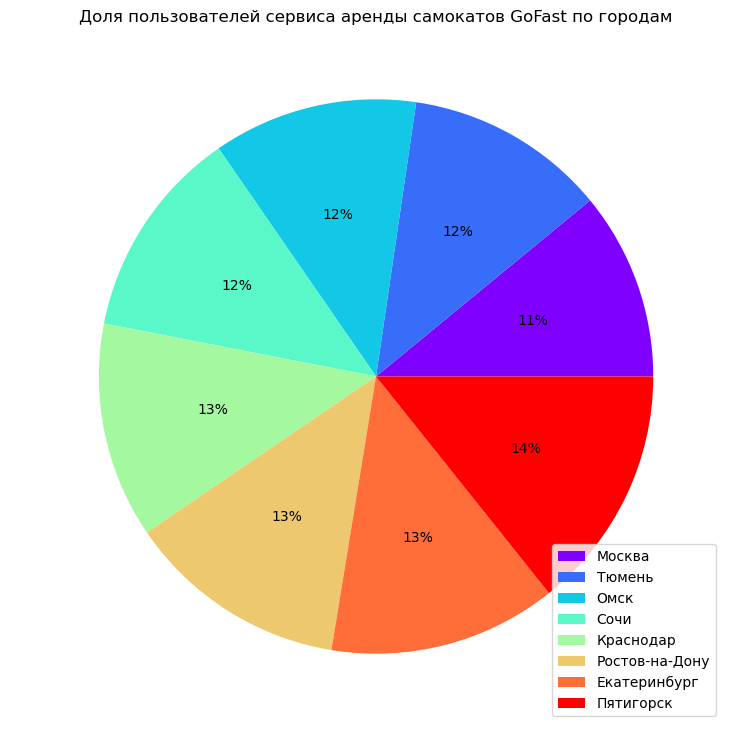

In [45]:
# Построим столбчатую диаграмму, показывающую долю пользователей сервиса GoFast по городам 
df_users.groupby('city')['user_id'].agg('count').sort_values(ascending=True).plot(kind='pie',labels=None, label= ' ', autopct ='%1.0f%%',legend=True,figsize=(9, 9), title ='Доля пользователей сервиса аренды самокатов GoFast по городам', cmap = 'rainbow')

plt.show()



    По данным столбчатой диаграммы можно увидеть, что наибольшая доля пользователей находится в Пятигорске, меньше всего пользователей в Москве. Можно заметить примерно равное распределение пользователей по городам, большого разброса значений не наблюдается.

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

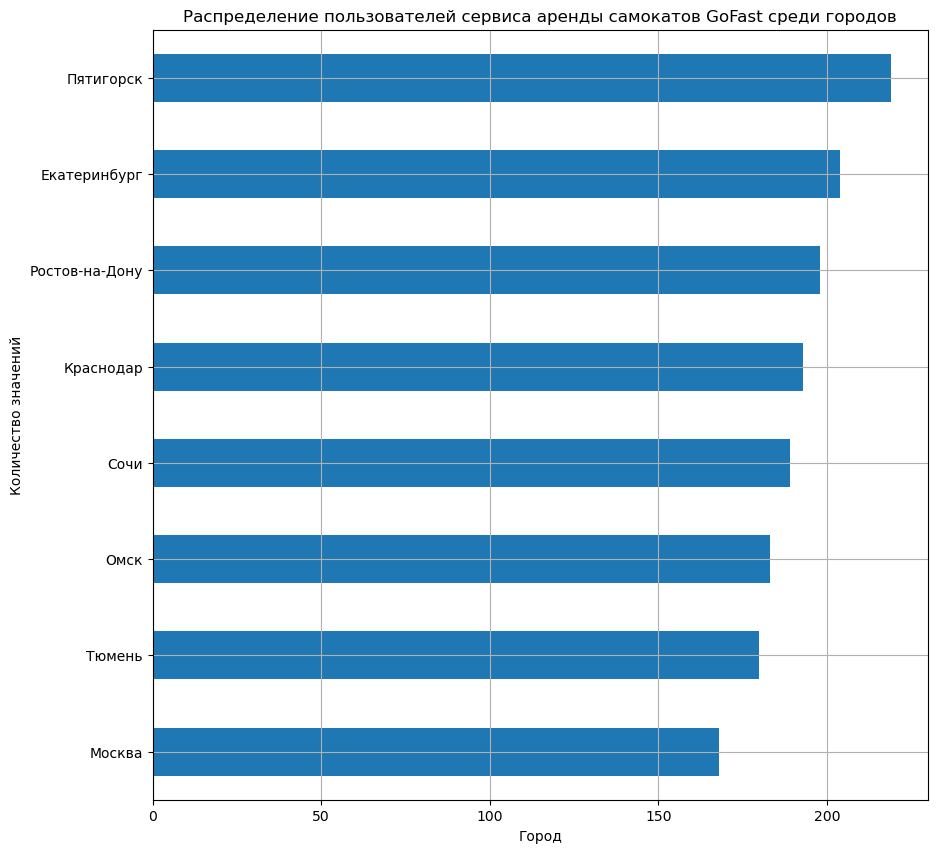

In [46]:
plt.figure(figsize= (10,10))
(df_users.groupby('city')['user_id'].agg('count').sort_values(ascending=True).plot(kind='barh', grid=True))
plt.title('Распределение пользователей сервиса аренды самокатов GoFast среди городов')
plt.ylabel('Количество значений')
plt.xlabel('Город')
plt.xticks(rotation = 'horizontal')
plt.show
# C помощью функции value_counts() посчитаем количество уникальных значений в столбце city.
df_users['city'].value_counts()


Как видно из графика, больше всего пользователей сервиса аренды самокатов GoFast в Пятигорске, меньше всего в Москве.

    3.2 Соотношение пользователей с подпиской и без подписки 

In [47]:
# Посчитаем количество пользователей сервиса, которые не имеют подписки
df_users.query('subscription_type == "free"')['subscription_type'].count()




835

In [48]:
# Посчитаем количество пользователей сервиса, которые имеют подписку
df_users.query('subscription_type =="ultra"')['subscription_type'].count()

699

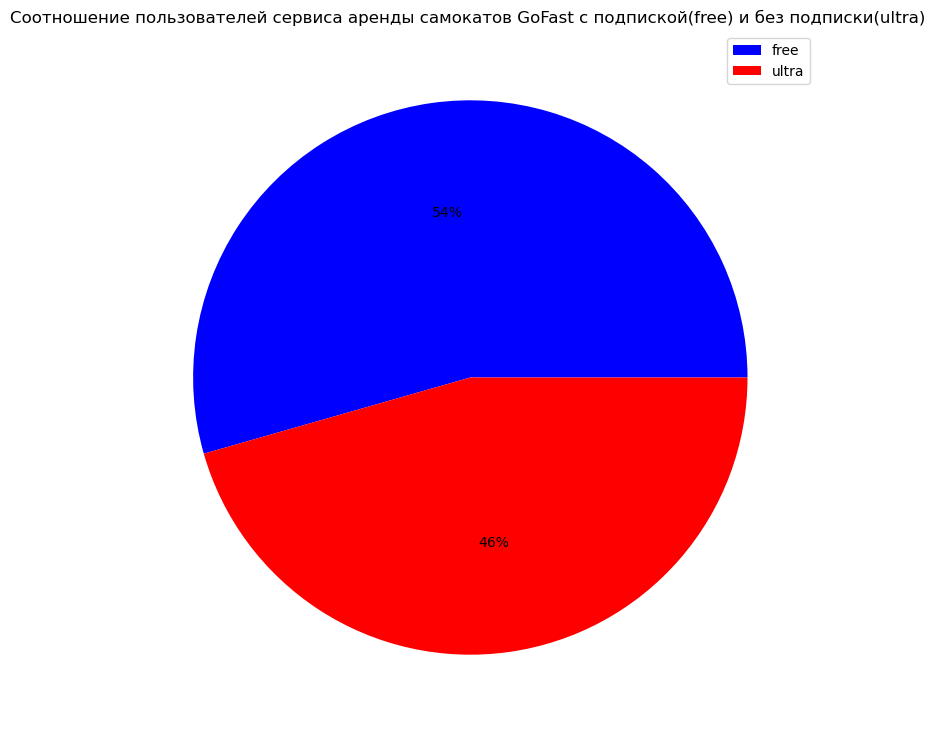

In [49]:
# Построим столбчатую диаграмму, показывающую соотношение пользователей с подпиской и без подписки
df_users.groupby('subscription_type')['user_id'].agg('count').sort_values(ascending=False).plot(kind='pie',labels=None, label= ' ', autopct ='%1.0f%%',legend=True,figsize=(9, 9), title ='Соотношение пользователей сервиса аренды самокатов GoFast c подпиской(free) и без подписки(ultra) ', cmap = 'bwr')
plt.show()

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

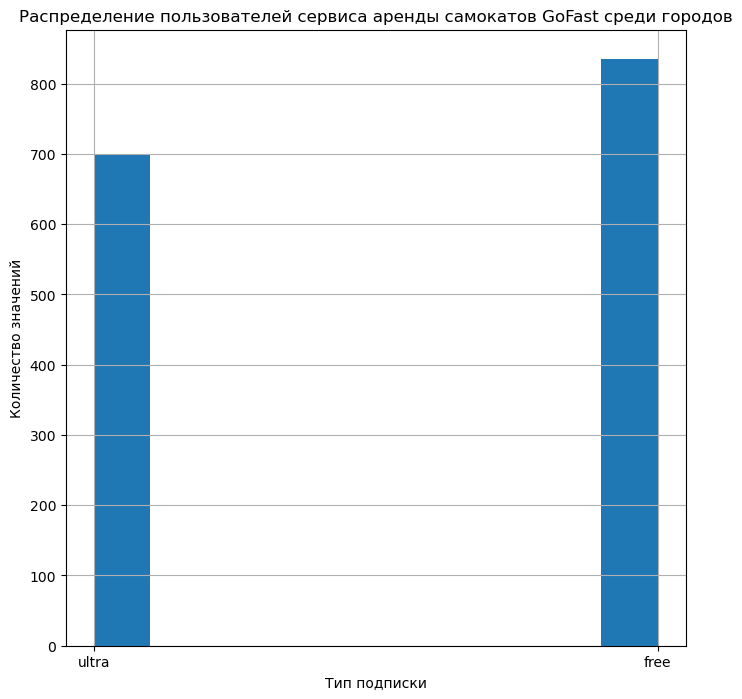

In [44]:
plt.figure(figsize= (8,8))
df_users.subscription_type.hist(bins=10, grid=True) 
plt.title('Распределение пользователей сервиса аренды самокатов GoFast среди городов')
plt.ylabel('Количество значений')
plt.xlabel('Тип подписки')
plt.show
# Применим метод describe() к столбцу subscription_type.
df_users['subscription_type'].describe()

      Как видно из гистограммы, больше всего пользователей, которые не имеют подписки(835 человек). Почти 700 пользователей имеют подписку. Могу предположить, что многие пользователи сервиса не хотят оформлять подписку и тратить лишние 200 рублей в месяц, так как пользуются самокатом нечасто и довольно редко.  

     3.3 Возраст пользователей

count    1534
mean       25
std         5
min        12
25%        22
50%        25
75%        28
max        43
Name: age, dtype: Int64

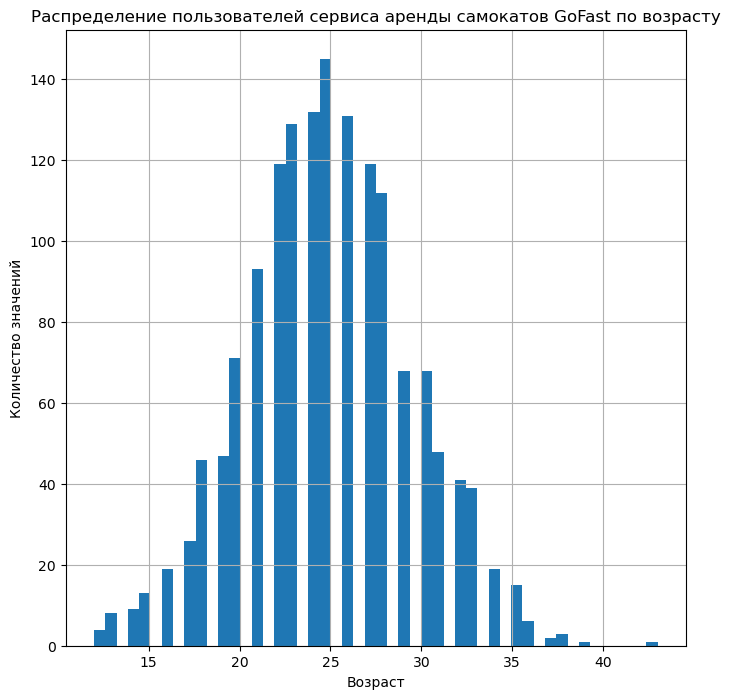

In [50]:
plt.figure(figsize= (8,8))
df_users.age.hist(bins=50, grid=True) 
plt.title('Распределение пользователей сервиса аренды самокатов GoFast по возрасту')
plt.ylabel('Количество значений')
plt.xlabel('Возраст')
plt.show
# С помощью метода describe() изучим основные статистические характеристики данных по признаку age. Округлим значения в большую сторону и приведем к целочисленному формату 
df_users['age'].describe().round().astype('Int64')

     Медиана и среднее значение совпдают и равны 25. Минимальный возраст пользователя равен 12. Максимальное значение равно 43 годам. 
    На графике видим, что крайние значения признака встречаются довольно редко, а значения, близкие к средней величине, встречаются довольно часто . Описывая гистограмму можно сказать, что она имеет вид нормального распределения. 

    3.4 Расстояние, которое пользователь преодолел за одну поездку
   

count    18068
mean      3071
std       1117
min          1
25%       2543
50%       3134
75%       3776
max       7211
Name: distance, dtype: int32

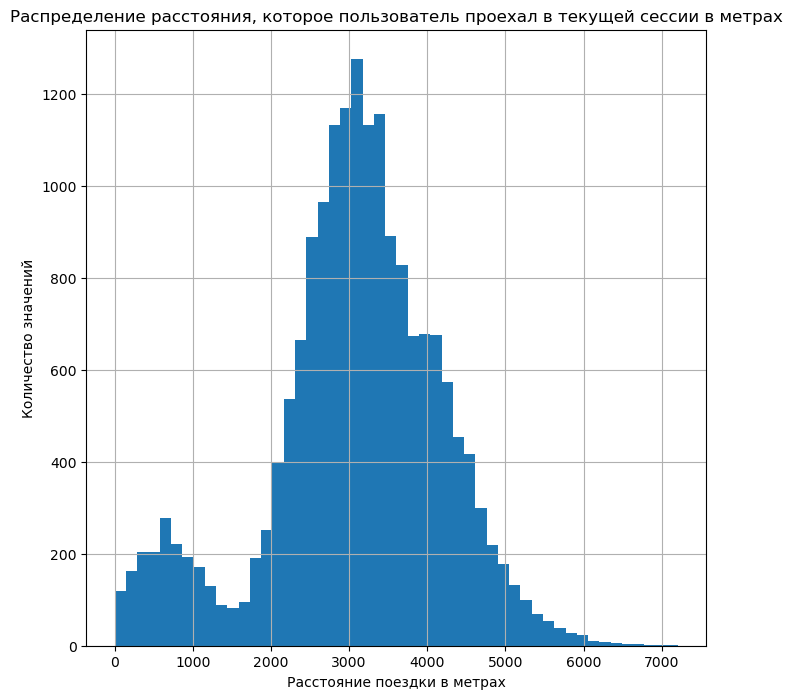

In [51]:
plt.figure(figsize= (8,8))
df_rides.distance.hist(bins=50, grid=True) 
plt.title('Распределение расстояния, которое пользователь проехал в текущей сессии в метрах')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние поездки в метрах')
plt.show
# C помощью метода describe () изучим основные статистические показатели столбца distance 
df_rides['distance'].describe().round().astype('int')

      По данным гистограммы можно заметить, что среднее(3071 м) и медиана(3134 м) практически равны. Описывая гистограмму, можно сказать что она имеет вид нормального распределения, так как крайние значения встречаются достаточно редко, в то время как значения, близкие к среднему, встречаются довольно часто. 
      Можно сделать вывод, что поездки можно разделить на два типа: короткие поездки (от 0 до 3071 м) и далекие(от 3071 до 7211 м)

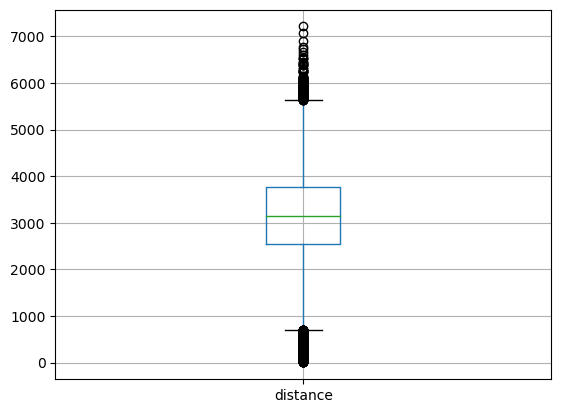

In [47]:
# Построим диаграмму размаха boxplot
df_rides.boxplot(column='distance')
plt.show()

    Видно, что нижний "ус" упирается в значение 800 метров. Верхний "уc" примерно равняется 5700 метров. Это граница нормального размаха. Все, что лежит выше 5700 метров, можно считать выбросами.

    3.5 Продолжительность поездок

count    18068
mean        18
std          6
min          0
25%         14
50%         18
75%         22
max         41
Name: duration, dtype: int32

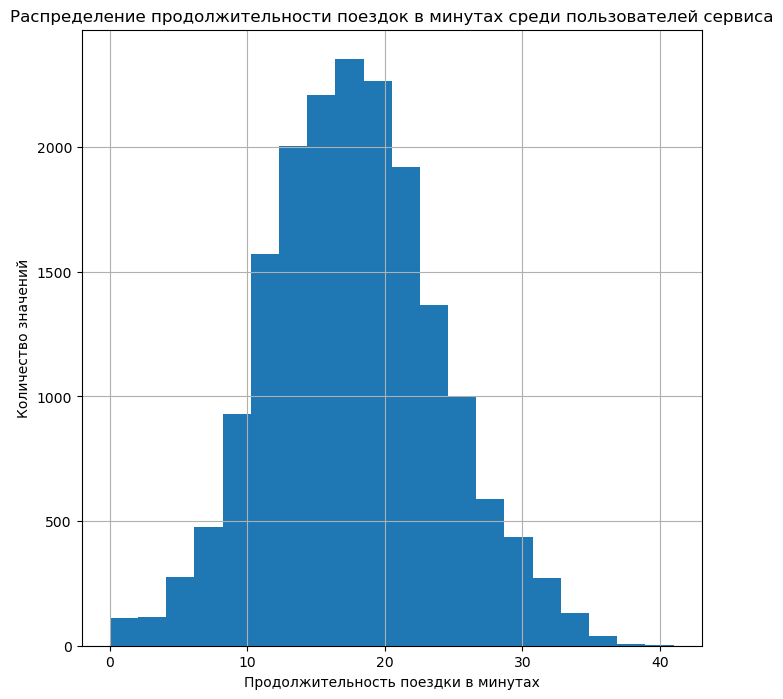

In [48]:
plt.figure(figsize= (8,8))
df_rides.duration.hist(bins=20, grid=True) 
plt.title('Распределение продолжительности поездок в минутах среди пользователей сервиса')
plt.ylabel('Количество значений')
plt.xlabel('Продолжительность поездки в минутах')
plt.show
# C помощью метода describe () получим числовое описание данных для колонки duration
df_rides['duration'].describe().round().astype('int') 


    По гистограмме видно, что среднее значение и медиана совпадают и равны 18 минутам. Минимальное значение равно 0. Считаю, что это аномальное значение. Также могу предположить, что  пользователь случайно нажал кнопку "Начать поездку" и сразу завершил сессию, из-за чего продолжительность его поездки составила 0 минут. Описывая гистограмму, можно сказать, что она имеет вид нормального распределения.

## 11 Вывод по исследовательскому анализу данных: 
1) Согласно данным гистограммы, больше всего пользователей сервиса GoFast находится  в Пятигорске - 219 человек, меньше всего пользователей живет в Москве -168 человек
2) По данным столбчатой диаграммы доля пользователей, не имеющих подписку, от общего количества пользователей сервиса GoFast составляет 54 %. Соответственно, доля пользователей. оформивших подписку, составляет 46 %.
3) Средний возраст пользователей составил 25 лет. Медиана также равна 25. Самому младшему пользователю 12 лет. Самому старшему пользователю 43 года. 
4) Среднее расстояние поездки в метрах составило 3 км(3071 м). Медиана составила 3134 м. Максимальное расстояние поездки составило 7211 метров. 
5) Средняя продолжительность поездки в минутах составила 18 минут. Медиана(второй квартиль) равна также 18 минутам. Максимальная продолжительность поездки составила 41 минуту.


##   12  Шаг 4. Объединение данных 


   ##  13 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [53]:

df_general = df_users.merge(df_rides).merge(df_subscriptions)
df_general

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


    После объединения данных сравним количество строк в таблицах до объединения и после, также посчитаем количество уникальных пользователей и проверим наличие пропусков. 


In [54]:
# вычислим количество строк в датафрейме df_users
len(df_users)


1534

In [55]:
# Проверим наличие пропусков в датафрейме 
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [56]:
# Посчитаем количество уникальных пользователей
df_users.value_counts()

user_id  name       age  city            subscription_type
1        Кира       22   Тюмень          ultra                1
1020     Камилла    32   Москва          free                 1
1029     Игорь      21   Краснодар       free                 1
1028     Вадим      17   Сочи            free                 1
1027     Мария      21   Сочи            free                 1
                                                             ..
510      Роман      24   Ростов-на-Дону  ultra                1
509      Ян         29   Москва          ultra                1
508      Станислав  15   Тюмень          ultra                1
507      Эвелина    27   Пятигорск       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64

In [57]:
# Посчитаем количество строк в таблице df_rides
len(df_rides) 

18068

In [58]:
# Проверим датафрейм на наличие пропусков
df_rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

In [59]:
# Посчитаем количество строк в таблице df_subscriptions
len(df_subscriptions)

2

In [60]:
# Проверим датафрейм на наличие пропусков 
df_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

     Размеры таблиц после объединения остались такими же как и до объединения. В каждой из 3 таблиц по-прежнему нет пропущенных значений.

    4.2 Создадим ещё два датафрейма из датафрейма, созданного в шаге 4.1:

    c данными о пользователях без подписки;
    с данными о пользователях с подпиской.
    
    
    

In [62]:
# Создадим датафрейм с данными о пользователях без подписки, выведем случайным образом 10 строк датафрейма с помощью метода sample
df_users_free = df_users.query("subscription_type =='free'").merge(df_rides).merge(df_subscriptions)

In [63]:
df_users_free.sample(random_state=1, n =10)

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
10368,1449,Софья,28,Москва,free,3708.588548,22.0,2021-02-14,2,8,50,0
1131,781,Амир,23,Пятигорск,free,3623.675880,22.0,2021-12-05,12,8,50,0
10131,1431,Яна,26,Екатеринбург,free,2075.008422,14.0,2021-05-18,5,8,50,0
9691,1402,Мария,30,Ростов-на-Дону,free,2756.188060,9.0,2021-10-09,10,8,50,0
9681,1402,Мария,30,Ростов-на-Дону,free,944.246089,15.0,2021-01-07,1,8,50,0
4288,1013,Зарина,24,Москва,free,2700.273410,22.0,2021-12-12,12,8,50,0
10654,1470,Ангелина,32,Сочи,free,3854.432849,13.0,2021-11-16,11,8,50,0
10378,1449,Софья,28,Москва,free,4445.718112,20.0,2021-09-21,9,8,50,0
10658,1471,Роман,21,Краснодар,free,4523.605506,25.0,2021-01-09,1,8,50,0
8346,1306,Антонина,22,Москва,free,1761.181273,20.0,2021-03-20,3,8,50,0


In [65]:
# Создадим датафрейм с данными о пользователях с подпиской, выведем случайным образом 10 строк датафрейма с помощью метода sample()
df_users_ultra = df_users.query("subscription_type =='ultra'").merge(df_rides).merge(df_subscriptions)

In [66]:
df_users_ultra.sample(random_state=1, n=10)

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
3773,405,Руслан,22,Екатеринбург,ultra,3001.697420,14.0,2021-11-11,11,6,0,199
6012,643,Егор,31,Москва,ultra,2537.701321,18.0,2021-11-21,11,6,0,199
3464,373,Даниэль,26,Тюмень,ultra,2841.412234,14.0,2021-01-03,1,6,0,199
1518,164,Зарина,17,Сочи,ultra,3948.507835,23.0,2021-02-13,2,6,0,199
3762,404,Влад,23,Сочи,ultra,4179.177250,18.0,2021-07-22,7,6,0,199
1070,115,Полина,25,Москва,ultra,2991.653655,20.0,2021-02-11,2,6,0,199
2809,300,Данила,27,Ростов-на-Дону,ultra,3220.194392,12.0,2021-04-14,4,6,0,199
3792,408,Станислав,26,Ростов-на-Дону,ultra,2922.883623,20.0,2021-04-10,4,6,0,199
3819,410,Виктор,19,Тюмень,ultra,2616.878715,13.0,2021-10-11,10,6,0,199
5350,574,Жанна,34,Пятигорск,ultra,4198.428714,21.0,2021-03-09,3,6,0,199


     4.3 Визуализируем информацию о  расстоянии и времени поездок для пользователей обеих категорий

count    11568
mean      3045
std       1246
min          1
25%       2367
50%       3115
75%       3906
max       7211
Name: distance, dtype: int32

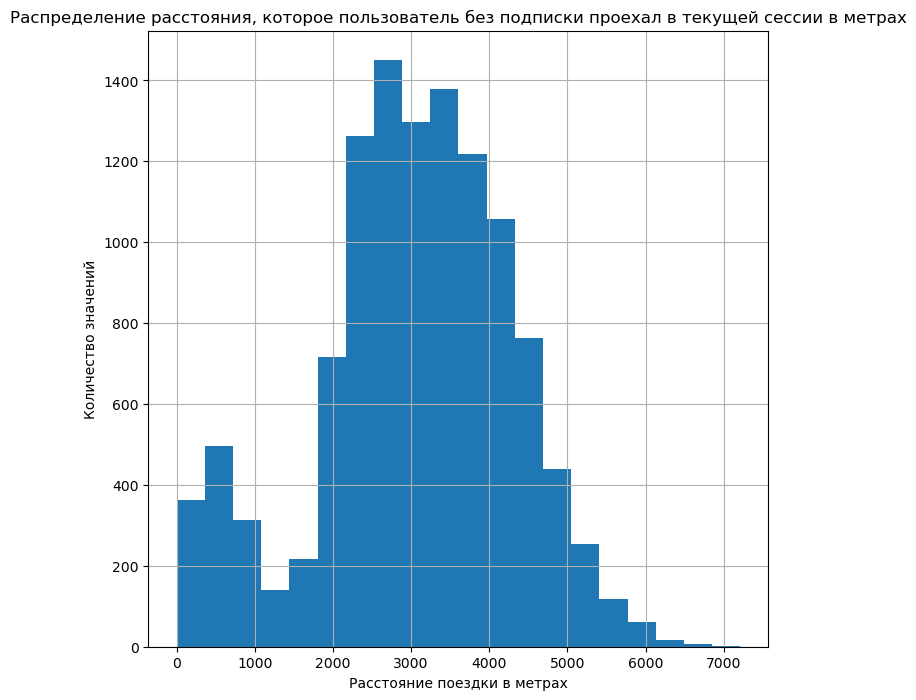

In [54]:
plt.figure(figsize= (8,8))
df_users_free.distance.hist(bins=20, grid=True) 
plt.title('Распределение расстояния, которое пользователь без подписки проехал в текущей сессии в метрах')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние поездки в метрах')
plt.show
# C помощью метода describe () изучим основные статистические показатели столбца distance 
df_users_free['distance'].describe().round().astype('int')

     По данным гистограммы мы видим, что среднее значение равно 3045 метрам. Медиана равна 3115 метрам. Если отбросить значения от 0 до 1000 м, можно сказать, что гистограмма имеет вид нормального распределения. 

count    11568
mean        17
std          6
min          0
25%         13
50%         17
75%         22
max         35
Name: duration, dtype: int32

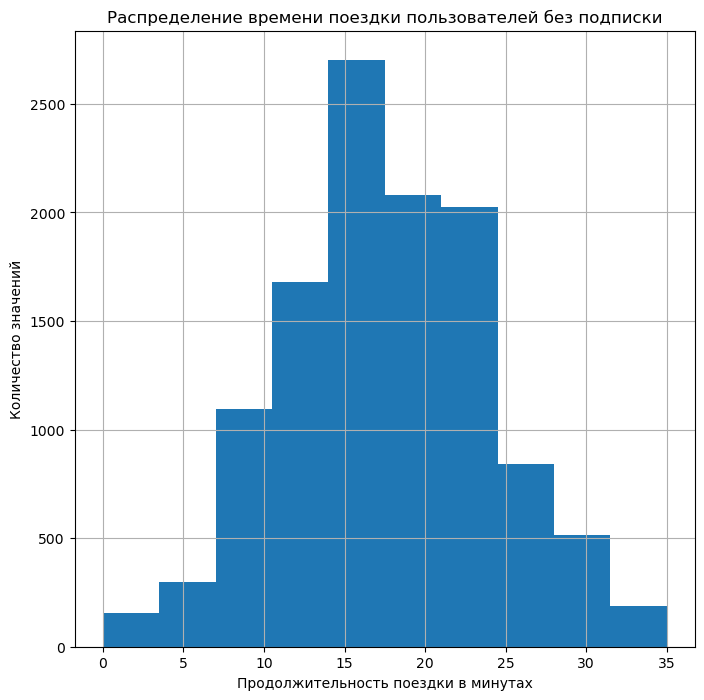

In [55]:
plt.figure(figsize= (8,8))
df_users_free.duration.hist(bins=10, grid=True) 
plt.title('Распределение времени поездки пользователей без подписки')
plt.ylabel('Количество значений')
plt.xlabel('Продолжительность поездки в минутах')
plt.show
# C помощью метода describe () получим числовое описание данных столбца duration 
df_users_free['duration'].describe().round().astype('int')

    Видно по гистограмме, что средняя продолжительность поездки среди пользователей без подписки равна 17 минутам. Медиана также равна 17. Максимальная продолжительность поездки в два раза превышает среднее значение и составляет 35 минут. Межквартильный размах равен разнице между третьим квартилем и первым квартилем и составляет 9 минут. Описывая гистограмму, можно сказать, что она имеет вид нормального распределения. 

count    6500
mean     3115
std       837
min       244
25%      2785
50%      3149
75%      3561
max      5700
Name: distance, dtype: int32

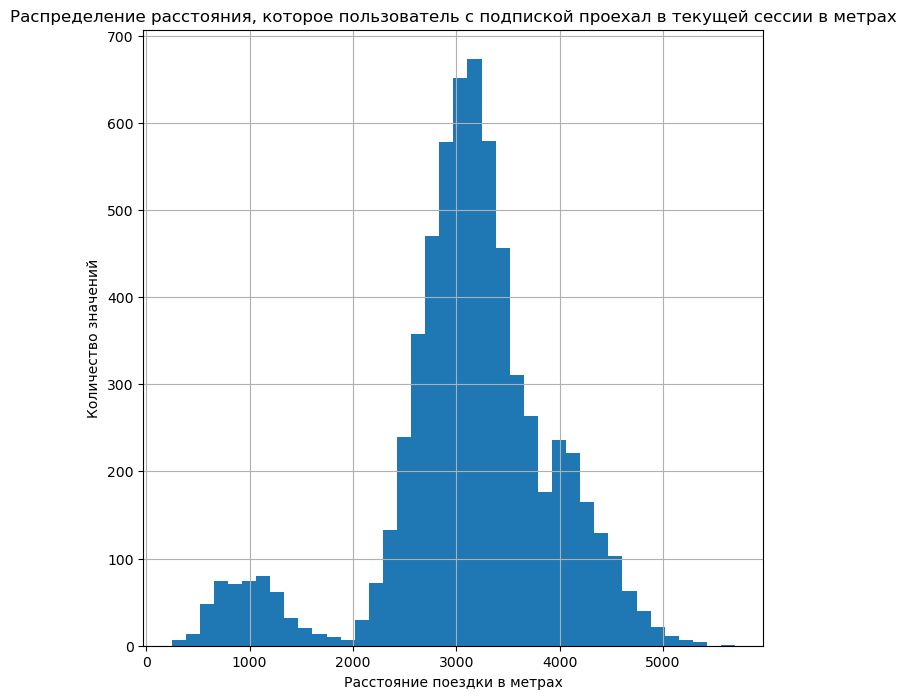

In [56]:
plt.figure(figsize= (8,8))
df_users_ultra.distance.hist(bins=40, grid=True) 
plt.title('Распределение расстояния, которое пользователь c подпиской проехал в текущей сессии в метрах')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние поездки в метрах')
plt.show
# C помощью метода describe () изучим основные статистические показатели столбца distance 
df_users_ultra['distance'].describe().round().astype('int')

      По гистограмме видим, что среднее значение составило 3115 метров. Медиана(второй квартиль) равен 3149 метров. Минимальное расстояние равно 244 метрам. Максимальное расстояние, которое проехал пользователь с подпиской составило 5700 метров. Описывая гистограмму можно сказать, что она не имеет вид нормального распределения, так как крайние значения слева встречаются довольно часто, как и значения, близкие к средней величине. 
      

Text(0.5, 1.0, 'Распределение расстояния поездки пользователей с подпиской и без подписки ')

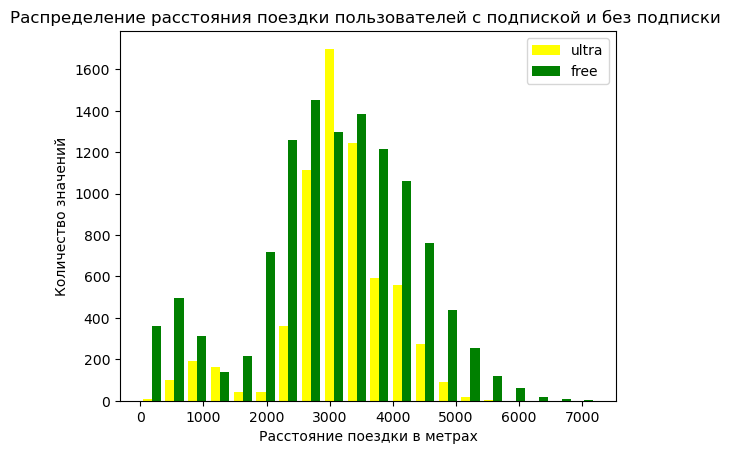

In [67]:
# Сравним распределения расстояния поездок  пользователей с подпиской и без подписки
x1 = list(df_users_ultra['distance'])
x2 = list(df_users_free['distance'])
colors = ['yellow','green']
names = ['ultra', 'free'] 

plt.hist([x1, x2], bins = 20, color = colors, label=names)
plt.legend()
plt.xlabel('Расстояние поездки в метрах')
plt.ylabel('Количество значений')
plt.title('Распределение расстояния поездки пользователей с подпиской и без подписки ')

      Как видно из графика, пользователи без подписки проезжают больше 5 км, чем пользователи с подпиской.

count    6500
mean       19
std         6
min         4
25%        15
50%        19
75%        22
max        41
Name: duration, dtype: int32

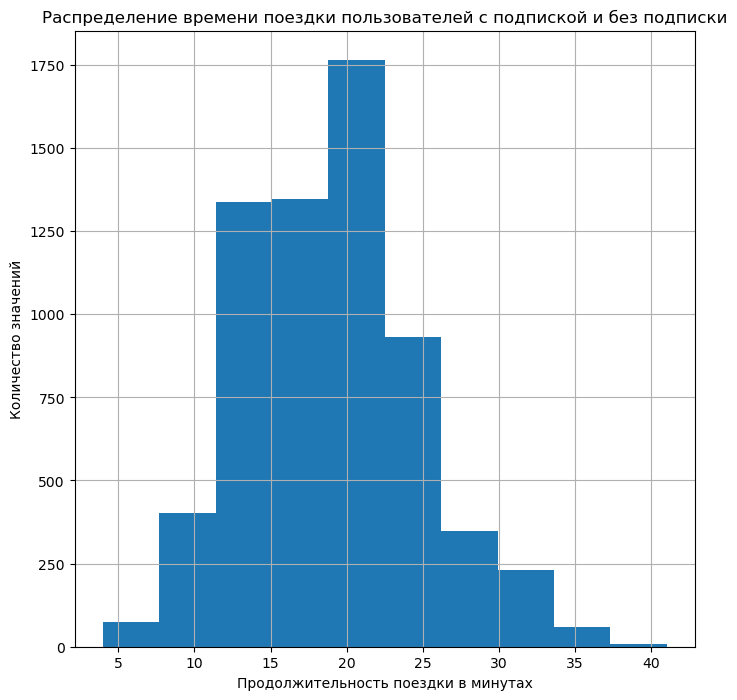

In [68]:
plt.figure(figsize= (8,8))
df_users_ultra['duration'].hist(bins=10, grid=True) 
plt.title('Распределение времени поездки пользователей с подпиской и без подписки')
plt.ylabel('Количество значений')
plt.xlabel('Продолжительность поездки в минутах')
plt.show
# C помощью метода describe () получим числовое описание данных для столбца duration
df_users_ultra['duration'].describe().round().astype('int')

      Глядя на гистограмму, можно сказать с уверенностью, что она имеет вид нормального распределения. Минимальное время поездки составило 4 минуты, максимальное время 41 минуту. Среднее значение равно 19, медиана равна 19 минутам.

Text(0.5, 1.0, 'Распределение продолжительности поездки  пользователей с подпиской и без')

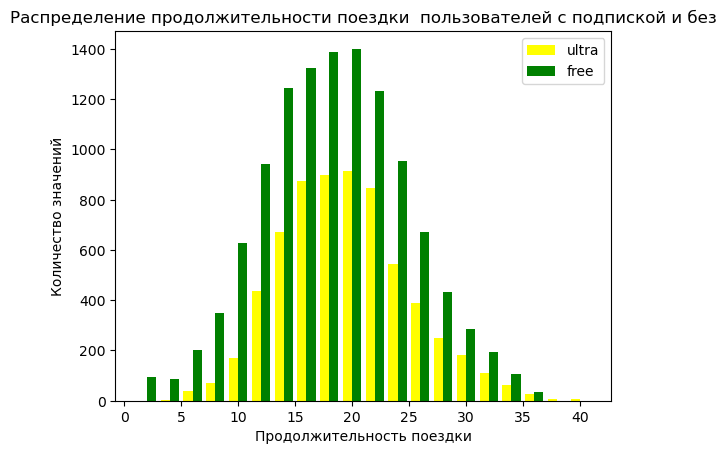

In [69]:
# Сравним распределения продолжительности поездок  пользователей с подпиской и без подписки
x1 = list(df_users_ultra['duration'])
x2 = list(df_users_free['duration'])
colors = ['yellow','green']
names = ['ultra', 'free'] 

plt.hist([x1, x2], bins = 20, color = colors, label=names)
plt.legend()
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество значений')
plt.title('Распределение продолжительности поездки  пользователей с подпиской и без')


     Как видно из графика, продолжительность поездки среди пользователей с подпиской и без подписки примерно равная и составляет 20 минут.

    Вывод по Объединению данных: 
    В данном шаге исследования мы объединили данные о пользователях, поездках и подписках в один датафрейм df_general. Также были созданы два датафрейма df_users_free и df_users_ultra, которые содержат информацию о пользователях сервиса без подписки и с подпиской соответственно. По каждому из датафреймов были построены гистограммы для признаков duration и distance, описаны вид гистограмм и получено числовое описание данных с помощью метода decribe().

##   14 Шаг 5. Подсчёт выручки

   ##  15 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. 
   
    Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [70]:

df_new = df_general.groupby(['user_id', 'date_month','subscription_type','minute_price','start_ride_price','subscription_fee']).agg({'duration': 'sum' , 'distance': 'sum', 'name':'count'}).reset_index()

df_new.head(25)


,user_id,date_month,subscription_type,minute_price,start_ride_price,subscription_fee,duration,distance,name
0,1,1,ultra,6,0,199,42.0,7027.511294,2
1,1,4,ultra,6,0,199,7.0,754.159807,1
2,1,8,ultra,6,0,199,46.0,6723.470560,2
3,1,10,ultra,6,0,199,32.0,5809.911100,2
4,1,11,ultra,6,0,199,56.0,7003.499363,3
5,1,12,ultra,6,0,199,28.0,6751.629942,2
6,2,3,ultra,6,0,199,63.0,10187.723006,3
7,2,4,ultra,6,0,199,40.0,6164.381824,2
8,2,6,ultra,6,0,199,14.0,3255.338202,1
9,2,7,ultra,6,0,199,48.0,6780.722964,2


   ##  16 5.2 В данный датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [71]:
# Добавим столбец с помесячной выручкой по каждому пользователю
df_new['monthly_revenue'] = df_new['start_ride_price'] * df_new['name'] + df_new['duration'] * df_new['minute_price'] + df_new['subscription_fee']

In [72]:
df_new.head(10)

,user_id,date_month,subscription_type,minute_price,start_ride_price,subscription_fee,duration,distance,name,monthly_revenue
0,1,1,ultra,6,0,199,42.0,7027.511294,2,451.0
1,1,4,ultra,6,0,199,7.0,754.159807,1,241.0
2,1,8,ultra,6,0,199,46.0,6723.470560,2,475.0
3,1,10,ultra,6,0,199,32.0,5809.911100,2,391.0
4,1,11,ultra,6,0,199,56.0,7003.499363,3,535.0
5,1,12,ultra,6,0,199,28.0,6751.629942,2,367.0
6,2,3,ultra,6,0,199,63.0,10187.723006,3,577.0
7,2,4,ultra,6,0,199,40.0,6164.381824,2,439.0
8,2,6,ultra,6,0,199,14.0,3255.338202,1,283.0
9,2,7,ultra,6,0,199,48.0,6780.722964,2,487.0


In [73]:
# Получим числовое описание данных для столбца 'monthly_revenue'
df_new['monthly_revenue'].describe().round().astype('int')

count    11331
mean       342
std        154
min         58
25%        234
50%        319
75%        415
max       1444
Name: monthly_revenue, dtype: int32

    Видим, что среднее значение составило 342 рубля, тогда как медиана равна 319 рублей. Минимальное значение равно 58, максимальное значение равно 1444 рубля.

    Вывод: В 5 шаге нашего исследования мы нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также посчитали и добавили столбец с помесячной выручкой для каждого пользователя. Перейдем к следующему этапу исследования 

## 17  Шаг 6. Проверка гипотез 

 ## 18  6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформулируем гипотезы:

Н0 - среднее время поездки у пользователей с подпиской равно среднему времени поездки у пользователей без подписки 

Н1 - среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки

In [74]:

alpha = 0.05 # укажем уровень статистической значимости 
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_users_ultra['duration'],df_users_free['duration'],alternative = 'greater') # используем метод st.ttest_ind 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу:среднее время поездки у пользователей с подпиской равно среднему времени поездки у пользователей без подписки')
else: 
    print('Не получилось отвергнуть нулевую гипотезу:')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу:среднее время поездки у пользователей с подпиской равно среднему времени поездки у пользователей без подписки


    Вывод: На имеющихся данных на уровне значимости 5% (уровне доверия 95%) есть основания  отвергнуть нулевую гипотезу в пользу альтернативы. Cреднее время поездки у пользователей с подпиской больше чем у пользователей без подписки.

   ## 19 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы. 



   Cформулируем гипотезы: 

H0 - Расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.

H1 - Расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [75]:

alpha = 0.05
# укажем уровень статичтической значимости 
# если p-value окажется меньше него, то отвергнем гипотезу
interested_value = 3130
results = st.ttest_1samp(df_users_ultra['distance'], interested_value, alternative = 'greater') # используем метод st.ttest_1samp

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров ')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


 Вывод: На имеющихся данных на уровне значимости 5% (уровне доверия 95%) нет оснований  отвергнуть нулевую гипотезу в пользу альтернативы. Расстояние, которое проезжают пользователи с подпиской за одну поездку , не превышает 3130 метров 


  ##  20  6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод. 

Cформулируем гипотезы: 

H0 - Средняя месячная выручка от пользователей с подпиской равна средней месячной выручке от пользователей без подписки.

Н1 - Средняя месячная выручка от пользователей с подпиской выше средней месячной выручки от пользователей без подписки.


In [76]:

alpha = 0.05
# укажем уровень статиcтической значимости 
sample1 = df_new.query('subscription_type == "ultra"')['monthly_revenue']
sample2 = df_new.query('subscription_type == "free"')['monthly_revenue']

results = st.ttest_ind(sample1, sample2, alternative = 'greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Средняя месячная выручка от пользователей с подпиской равна средней месячной выручке от пользователей бе подписки')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: Средняя месячная выручка от пользователей с подпиской равна средней месячной выручке от пользователей бе подписки


    Вывод: На имеющихся данных на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя месячная выручка у пользователей с подпиской выше чем у пользователей без подписки.


##  21  6.4. Представим  такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Ответим на вопрос: "Какой тест вам понадобился бы для проверки этой гипотезы?" 

    Чтобы проверить гипотезу о количестве обращений в техподдержку до и после обновления сервиса можно применть метод scipy.stats.ttest_rel(). Для решения потребуется тест на равенство средних для зависимых выборок, до и после изменений.

##  22  Общие выводы: 

Статистический анализ данных о пользователях сервиса GoFast завершен. В ходе исследования были выполнены следующие шаги: 
1) В первом шаге исследования были выгружены три датафрейма, была изучена общая информация о каждом из них, проведено первичное знакомство с данными. 
2) Во втором шаге была проведена предобработка данных, по каждому датафрейму было проверено наличие пропущенных значений, были изменены типы данных для нужных столбцов датафрейма, создан новый столбец date_month c номером месяца на основе столбца date.
3) В третьем шаге исследования провели исследовательский анализ данных. Было установлено, что больше всего пользователей сервиса GoFast находится  в Пятигорске - 219 человек, меньше всего пользователей живет в Москве -168 человек. 54 % пользователей не приобрели подписку, в то время как 46 % пользователей сервиса имеют подписку. Средний возраст пользователей сервиса составил 25 лет. Среднее расстояние, которое преодолевают пользователи равно 3071 м. Для визуализации данных по каждому признаку была построена гистограмма и сделаны выводы.
4) В четвертом шаге исследования было проведено объединение данных о пользователях, поездках и подписках в один датафрейм df_general. Также были созданы два датафрейма df_users_free и df_users_ultra, которые содержат информацию о пользователях сервиса без подписки и с подпиской соответственно. 
5) На этом шаге исследования был посчитан и добавлен столбец monthly_revenue, который отображает помесячную выручку, принесенную каждым пользователем. 
6) В шестом шаге исследования были проверены несколько гипотез, которые призваны помочь бизнесу вырасти и улучшить показатели. 

    Результаты статистического анализа данных могут быть полезны для заказчика - сервиса аренды самокатов GoFast. В ходе исследования были учтены интересы и пожелания заказчика. Можно дать определенные рекомендации: 
    1) 54 % пользователей не имеют подписку. 46 % пользователей имеют подписку. Стоит внедрить интересные и выгодные акции для новых пользователей сервиса, чтобы повысить лояльность и повысить процент пользователей, приобретающих подписку 
    2) Средний возраст пользователя сервиса составил 25 лет. Максимальный возраст 43 года. Можно сделать акцент на категорию пользователей старше 40 лет, так как компания недополучает прибыль.
    3) В среднем пользователь проезжает 3000 метров в течение 1 поездки
    4) Была отвергнута гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
    